# Clase 14

#### *Options*
#### Contingent Claims

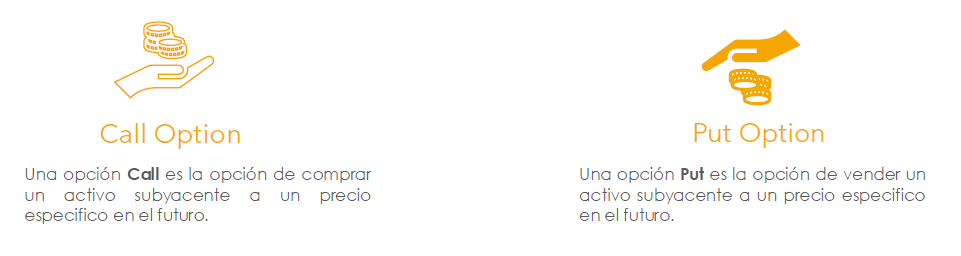

#### 1. Introducción

Las **opciones** son contratos financieros que otorgan al tenedor **el derecho, pero no la obligación**, de comprar o vender un activo subyacente (por ejemplo, una acción, un índice, una divisa o una materia prima, etc.) a un precio prefijado, denominado **precio de ejercicio** o *strike*, en una fecha futura determinada o antes de ella, dependiendo del tipo de opción. Desde la perspectiva de **“Contingent Claims”** (derechos contingentes), podemos pensar que cada opción genera un pago futuro que depende del valor que adopte el activo subyacente en el vencimiento o en el momento de ejercicio.

El proceso de valoración de una opción se basa en tres ideas centrales:

1. **Distribución futura del subyacente**.
   Modelamos cómo podría comportarse el precio $S_t$ del activo hasta el vencimiento $T$. En la práctica, usamos modelos de series de tiempo que capturan patrones de volatilidad, posibles saltos y dependencias autocorrelacionadas.

2. **$PayOff$**.
   Para una **opción de compra europea** (call), el pago al vencimiento se define como:

   $$
   \Phi_{\text{call}}(S_T)\;=\;\max\{\,S_T - K,\;0\},
   $$

   donde:

   * $S_T$ es el precio del activo al tiempo $T$.
   * $K$ es el precio de ejercicio.

   Para una **opción de venta europea** (put), el pago es:

   $$
   \Phi_{\text{put}}(S_T)\;=\;\max\{\,K - S_T,\;0\}.
   $$

3. **Valor presente descontado de la esperanza**.
   En mercados sin arbitraje, se define una **distribución “neutral al riesgo”** que ajusta la prima de riesgo incorporando la tasa libre de riesgo $r$. Bajo esta distribución, el valor de la opción hoy (en $t = 0$) es:

   $$
   C_0 \;=\; e^{-r\,T}\;\mathbb{E}^{\text{RN}}\bigl[\Phi_{\text{call}}(S_T)\bigr],
   $$

   donde $\mathbb{E}^{\text{RN}}$ denota la expectativa bajo la probabilidad neutral al riesgo, es decir, aquella distribución teórica de $S_T$ que produce precios de activos compatibles con $r$ y evita oportunidades de arbitraje (Black y Scholes, 1973; Merton, 1973).

**Citas clave (enfoque histórico y práctico):**

* **Bachelier (1900)** introdujo la idea de modelar precios con un movimiento browniano simple (con distribución normal).
* **Einstein (1905)** aportó con la demostración teórica del movimiento browniano (por medio de fórmula de propagación de calor de J. Fourier).
* **Cox, Ross y Rubinstein (1979)** formularon el modelo binomial, que es una aproximación discreta muy útil para economistas que prefieren ver decisiones de ejercicio paso a paso.
* **Black y Scholes (1973); Merton (1973)** presentaron la fórmula cerrada clásica, base de gran parte de las aplicaciones.
* **Heston (1993)** añadió un proceso de volatilidad estocástica, acercando el modelo a la realidad observada del “smile”.
* **Jim Simons** y su equipo de Renaissance Technologies enfatizaron la importancia de calibrar modelos con datos reales, incorporar «cola gruesa» y diseñar estrategias cuantitativas usando regresiones avanzadas y machine learning sobre grandes bases de datos.
* **Ed Thorp**: Através del fondo Princeton Newport Partners (PNP), fundada en 1974, fue declarada por su fundador, el profesor de matemáticas Edward O. Thorp, como el primer fondo de cobertura neutral (hedge fund) en el mercado del mundo.


---


#### 2. Características principales


#### 2.1 Derecho y asimetría de pagos

* El **comprador** de la opción paga una **prima** (denotada $C_0$ para calls y $P_0$ para puts) al vendedor.
* **Máxima pérdida** para el comprador es la prima pagada.
* **Ganancia potencial** es ilimitada en calls (si $S_T > K$) o está limitada al strike en puts (hasta $K$ si $S_T$ va a cero).
* Para el **vendedor** de la opción (quien recibe la prima), la ganancia máxima es la prima, pero asume un riesgo potencialmente grande si el subyacente se mueve adversamente. (Incluso pérdidas infinitas)

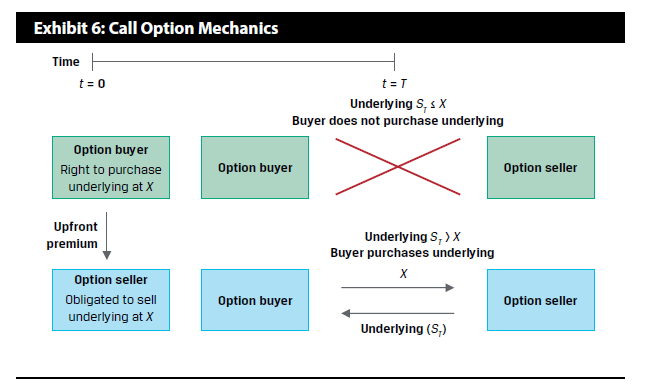


#### 2.2 Variables explicativas del precio de la opción (los “Greeks”)

En la práctica se evalúan las **sensibilidades** de la prima ante cambios pequeños en distintas variables. Estas métricas son esenciales para el **hedging** y para el análisis de riesgo:

1. $\Delta = \frac{\partial C}{\partial S}$:

   * Mide cómo varía el precio de la opción ante un cambio pequeño en el precio spot $S$.
   * Por ejemplo, $\Delta=0.60$ indica que si $S$ sube en 1 unidad, $C$ sube aproximadamente en 0.60 unidades.

2. $\Gamma = \frac{\partial^2 C}{\partial S^2}$:

   * Indica la curvatura de la relación entre $C$ y $S$.
   * Importante para estimar la **no linealidad** y para ajustar la estrategia de cobertura ($\Delta$-hedge) con más precisión.

3. $\Theta = -\frac{\partial C}{\partial t}$:

   * Conocida como **decadencia temporal** o *time decay*.
   * Mide cuánto pierde la opción por unidad de tiempo que pasa, manteniendo todo lo demás constante.

4. $\nu$ o **Vega** $= \frac{\partial C}{\partial \sigma}$:

   * Sensibilidad ante cambios en la **volatilidad implícita** $\sigma$.
   * Las opciones “caras” (ITM) y “fuera de dinero” (OTM) reaccionan de forma distinta ante subidas de volatilidad.

5. $\rho = \frac{\partial C}{\partial r}$:

   * Sensibilidad ante variaciones de la **tasa libre de riesgo** $r$.
   * Normalmente es de menor magnitud que Vega o Delta, pero útil para analizar entornos de tipos cambiantes.


#### 2.3 Moneyness

El nivel relativo de $S_t$ respecto a $K$ define la “moneyness” de la opción, lo cual es clave al momento de estimar el valor y el riesgo:

* **In the Money (ITM)**:

  * **Call**: $S_t > K$. El payoff intrínseco $S_t - K$ es positivo.
  * **Put**: $S_t < K$. El payoff intrínseco $K - S_t$ es positivo.

* **At the Money (ATM)**: $S_t \approx K$.

  * En este punto, la opción tiene poco o ningún valor intrínseco; casi todo su precio es valor temporal.

* **Out of the Money (OTM)**:

  * **Call**: $S_t < K$. El valor intrínseco es cero.
  * **Put**: $S_t > K$. El valor intrínseco es cero.

La moneyness afecta la **volatilidad implícita**: a menudo observamos un “skew” o “smile” en la volatilidad según el strike $K$. Desde un punto de vista econométrico, podemos estimar una función $\sigma_{\text{impl}}(K,T)$ mediante regresión local o splines sobre datos de mercado.

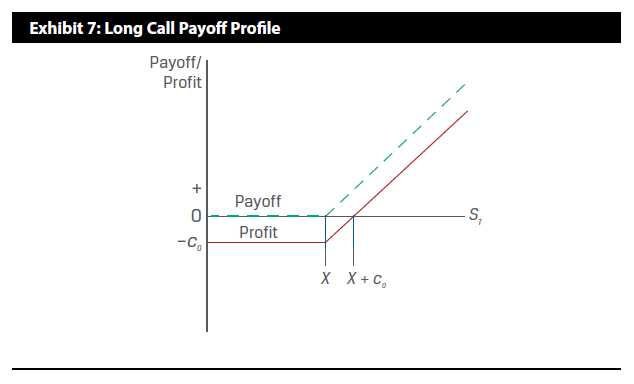

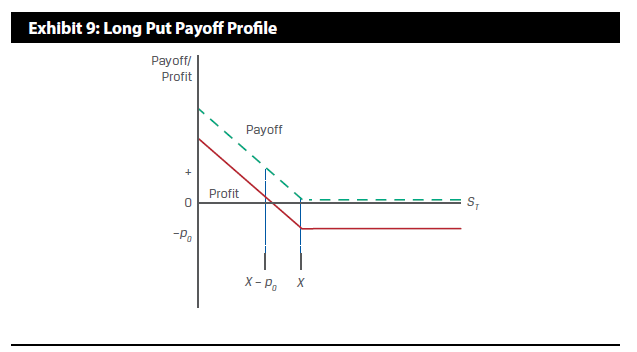


## 3. Historia

El desarrollo de la teoría y práctica de las opciones ha pasado por varios hitos fundamentales:

#### 3.1 Primeros antecedentes: Bachelier y el movimiento browniano

* **Bachelier (1900)**, en su tesis *Théorie de la spéculation*, asumió que los precios seguían un **movimiento browniano normal**:

  $$
  dS_t \;=\; \sigma\,dW_t,
  $$

  donde $W_t$ es un proceso de ruido blanco (Brownian Motion). Bajo este modelo, los incrementos de precio

  $$
  S_{t+\Delta t} - S_t \sim \mathcal{N}(0,\;\sigma^2\,\Delta t).
  $$

  De aquí surge la idea de que los retornos de corto plazo pueden modelarse con una distribución normal. Sin embargo, un gran inconveniente es que $S_t$ puede asumir valores negativos, lo cual no es realista para acciones.

* **Einstein (1905)** estableció las bases teóricas del movimiento browniano en partículas físicas, lo que inspiró a Bachelier a aplicar el mismo concepto en precios financieros.

Aunque el modelo de Bachelier sirvió para introducir la noción de **esperanza descontada** de un pago futuro, a economistas financieros les resultó limitado porque la distribución normal no respeta la positividad de precios y subestima las “colas” (eventos extremos).

#### 3.2 El modelo binomial de Cox–Ross–Rubinstein

* **Cox, Ross y Rubinstein (1979)** propusieron un **modelo discreto** en el que el precio del activo puede moverse en cada paso de tiempo $\Delta t$ a:

  $$
  S_{t+\Delta t} = 
  \begin{cases}
    S_t \,u, & \text{con probabilidad }p,\\
    S_t \,d, & \text{con probabilidad }1-p,
  \end{cases}
  $$

  donde $u > 1$ y $d < 1$ se eligen en función de la volatilidad histórica $\sigma$ como:

  $$
  u = e^{\sigma \sqrt{\Delta t}}, 
  \quad 
  d = e^{-\sigma \sqrt{\Delta t}}.
  $$

  Bajo el **enfoque neutral al riesgo**, la probabilidad ajustada $q$ se define de forma que el activo descontado sea un martingala:

  $$
  q = \frac{e^{r\,\Delta t} - d}{u - d}.
  $$

  Esto implica que el **valor esperado** del subyacente a futuro, descontado a la tasa $r$, coincide con el precio observado hoy.

El modelo binomial ofrece una forma **paso a paso** de comprender la valoración de opciones: en lugar de trabajar directamente con distribuciones continuas, el econometrista puede construir un **árbol discretizado** con $n$ pasos, calcular los payoffs en cada nodo terminal y “retropropagar” el precio descontado hacia atrás hasta $t = 0$. Este método es especialmente útil para:

1. **Opciones americanas**, donde la decisión de ejercicio puede ocurrir en cualquiera de los nodos intermedios.
2. **Opciones con payoffs simples** (digitals, barrier discretas) que se ajustan bien a un gráfico de árbol.

El mérito de Cox–Ross–Rubinstein es que, cuando $n \to \infty$, el modelo **converge** al resultado de Black–Scholes (1973). Para un econometrista, esto significa que podemos **aproximar** la solución continua con un procedimiento recursivo muy manejable en Excel, R o Python, sin necesidad de resolver PDE.

#### 3.3 Black y Scholes – Merton: la fórmula cerrada

* **Black y Scholes (1973)** revolucionaron la valoración de opciones al suponer que el precio $S_t$ sigue un **movimiento browniano geométrico**:

  $$
  dS_t = \mu\,S_t\,dt + \sigma\,S_t\,dW_t,
  $$

  donde $\mu$ es el retorno esperado bajo la medida real, $\sigma$ la volatilidad constante y $dW_t$ un incremento normal estándar.
* **Merton (1973)** aportó la conexión con las **ecuaciones en derivadas parciales** (PDE), demostrando que el valor de cualquier derivado $V(t,S)$ satisface la PDE de Black–Scholes:

  $$
  \frac{\partial V}{\partial t} 
  + r\,S\,\frac{\partial V}{\partial S} 
  + \tfrac12\,\sigma^2\,S^2\,\frac{\partial^2 V}{\partial S^2} 
  - r\,V \;=\; 0,
  $$

  con la condición terminal $V(T,S) = \Phi(S)$.

Bajo esta estructura y asumiendo mercados sin arbitraje ni fricción, se obtiene la **fórmula cerrada** para una opción europea de compra:

$$
C_0 \;=\; S_0\,\Phi(d_1) \;-\; K\,e^{-r\,T}\,\Phi(d_2),
$$

donde

$$
d_1 \;=\; \frac{\ln\bigl(\tfrac{S_0}{K}\bigr) + \bigl(r + \tfrac12\,\sigma^2\bigr)\,T}{\sigma\sqrt{T}}, 
\qquad
d_2 = d_1 - \sigma\sqrt{T}.
$$

Aquí:

* $S_0$: Precio spot actual del subyacente.
* $K$: Precio de ejercicio.
* $r$: Tasa continua libre de riesgo.
* $\sigma$: Volatilidad anualizada constante del activo.
* $\Phi(\cdot)$: Función de distribución acumulada de la normal estándar.

Para un econometrista, la relevancia de Black–Scholes–Merton radica en:

1. **Estimación de $\sigma$**: Se puede observar la “volatilidad implícita” en el mercado—es decir, la $\sigma$ que, al reemplazarla en la fórmula, reproduce el precio cotizado de la opción.
2. **Regresión cruzada**: Ajustar $\sigma_{\text{impl}} = f(K,T)$ usando métodos no paramétricos (por ejemplo, local linear regression o splines) para estimar la **superficie de volatilidad** y detectar “smiles” o “skews”.
3. **Comparación empírica**: Confrontar precios teóricos contra precios reales para identificar **bias** de modelo.




---

## 4. Tipos de Opciones: Americanas, Europeas y Asiáticas

Las opciones se clasifican según las reglas de **ejercicio** y el **tipo de payoff**. Cada categoría presenta retos específicos de valoración y modelado.

#### 4.1 Opciones Europeas

* **Definición**: Solo pueden ejercerse en la fecha de vencimiento $T$.

* **Payoff** al vencimiento:

  * **Call Europeo**:

    $$
    \Phi_{\text{call}}(S_T) \;=\; \max\{\,S_T - K,\;0\}.
    $$
  * **Put Europeo**:

    $$
    \Phi_{\text{put}}(S_T) \;=\; \max\{\,K - S_T,\;0\}.
    $$

* **Valoración**:

  * Si se cumplen los supuestos de Black–Scholes (volatilidad constante, distribución lognormal de retornos, sin dividendos), existe la **fórmula cerrada**:

    $$
    C_0 = S_0\,\Phi(d_1) - K\,e^{-r T}\,\Phi(d_2),
    $$

    con

    $$
    d_1 = \frac{\ln\bigl(\tfrac{S_0}{K}\bigr) + \bigl(r + \tfrac12\,\sigma^2\bigr)\,T}{\sigma \sqrt{T}}, 
    \quad 
    d_2 = d_1 - \sigma \sqrt{T}.
    $$
  * Desde un punto de vista estadístico, estimamos $\sigma$ a partir de la **volatilidad histórica** de $S_t$ (por ejemplo, con un GARCH) y la ajustamos a la **volatilidad implícita** usando mínimos cuadrados sobre datos de mercado.

* **Ventajas y limitaciones**:

  1. **Ventajas**:

     * Modelo analítico simple y eficiente.
     * Base para estimar la superficie implícita de volatilidad.
  2. **Limitaciones**:

     * No captura “smile” real de volatilidad.
     * Supone distribución lognormal perfecta de $S_T$.

#### 4.2 Opciones Americanas

* **Definición**: Pueden ejercerse en **cualquier** instante $t \in [0,T]$.

* **Valoración**:

  * No existe una **fórmula cerrada** general.
  * Se suele calcular usando:

    1. **Árbol binomial** (Cox–Ross–Rubinstein) con *backward induction* y condición de ejercicio temprano.
    2. **Métodos de diferencias finitas** para resolver la PDE de Black–Scholes con condición de frontera libre (problema de contorno libre).
    3. **Simulaciones Monte Carlo** con regresión (Longstaff–Schwartz), donde en cada paso se estima el “valor de continuar” mediante mínimos cuadrados.

* **Decisión de ejercicio temprano**:

  * Para **options without dividends** (por ejemplo, muchas acciones), suele no ser óptimo ejercer un **call americano** antes de $T$, porque retener el call y reinvertir el strike es más ventajoso desde el punto de vista del valor temporal.
  * Para **puts o acciones con dividendos**, puede ser óptimo ejercer antes, y el modelo debe comparar en cada paso el valor intrínseco $\max\{K - S_t, 0\}$ contra el valor de esperar.

* **Aplicación econométrica**:

  * Calcular $\Delta$-hedge dinámico para opciones americanas requiere estimaciones de $\Delta(t,S)$ en cada nodo del árbol o en cada simulación Monte Carlo.
  * Para una serie de precios históricos, se puede estimar cuántas veces los tenedores ejercieron anticipadamente en el pasado, y ajustar probabilidades de ejercicio en los modelos de valoración.



---

# Referencias Seleccionadas

* **Bachelier, L.** (1900). *Théorie de la spéculation*.
* **Einstein, A.** (1905). Fundamentos del movimiento browniano.
* **Cox, J., Ross, S. y Rubinstein, M.** (1979). “Option Pricing: A Simplified Approach”.
* **Black, F. y Scholes, M.** (1973). “The Pricing of Options and Corporate Liabilities”.
* **Merton, R. C.** (1973). “Theory of Rational Option Pricing”.
* **Merton, R. C.** (1976). “Option Pricing When Underlying Stock Returns Are Discontinuous”.
* **Heston, S. L.** (1993). “A Closed-Form Solution for Options with Stochastic Volatility”.
* **Simons, J.** (décadas de 1980–presente). Estrategias cuantitativas y calibración basada en datos reales.
